[3853.7838102145765, 4864.674482193889, 4995.717756241606, 5009.211433342205, 5010.564811314189, 5010.700189334277]


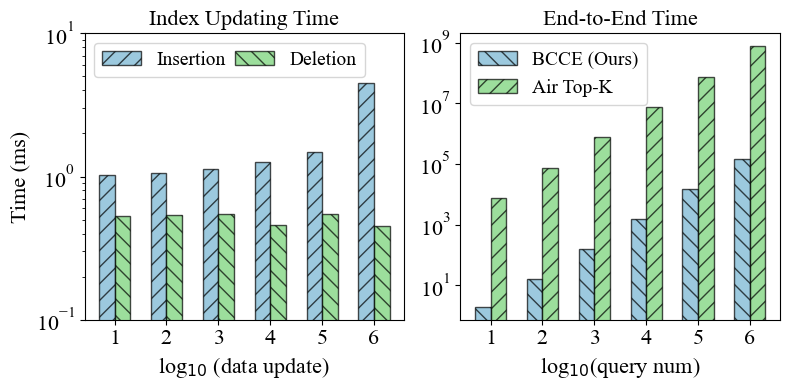

[46330, 46240, 45340, 36340, 39022, 19500]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# rcParams["font.size"] = 16
rcParams["font.family"] = "Times New Roman"
# rcParams["text.usetex"] = True
# rcParams["font.family"] = "serif"

def convert_to_float(value):
    return float(value.replace("ms", "")) if isinstance(value, str) else value

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].set_title("Index Updating Time", fontsize=16)
axs[1].set_title("End-to-End Time", fontsize=16)

df = pd.read_excel('insert.xlsx')  # 替换为你的文件名
latency = df.iloc[0, 1:].apply(convert_to_float)
insert_process = df.iloc[1, 1:].apply(convert_to_float)

df = pd.read_excel('delete.xlsx')  # 替换为你的文件名
latency = df.iloc[0, 1:].apply(convert_to_float)
delete_process = df.iloc[1, 1:].apply(convert_to_float)
air_topk_latency = 756.618

# figure 1
ax = axs[0]
x = df.columns[1:].astype(str)
x_positions = np.arange(len(x))
bar_width = 0.3
color_blue = "#72b3d0"  # BCCE 的颜色
color_green = "#72d072"  # baseline 的颜色
ax.bar(x_positions - bar_width/2, insert_process, width=bar_width, label="Insertion", color=color_blue, hatch="//", edgecolor="black", alpha=0.7)
ax.bar(x_positions + bar_width/2, delete_process, width=bar_width, label="Deletion", color = color_green, hatch='\\\\', edgecolor="black",alpha=0.7)
# ax.plot(x, latency, marker='o', label='Top-K Query Latency')
# ax.plot(x, process, marker='s', label='Index Updating Time')
ax.set_yscale('log')  # 使用对数坐标
ax.set_ylim(10**-1, 10**1)
ax.set_xlabel('log$_{10}$ (data update)', fontsize=16)
ax.set_ylabel('Time (ms)', fontsize=16)
ax.set_xticks(x_positions)
xtick_labels = [str(n + 1) for n in np.arange(len(x_positions))]
ax.set_xticklabels(xtick_labels, fontsize=16)
ax.legend(ncols=2, fontsize=14, columnspacing=0.5,loc='upper left')


for label in ax.get_yticklabels():
    label.set_fontsize(16)
    
# figure 1
df = pd.read_excel('delete.xlsx')  # 替换为你的文件名
latency = df.iloc[0, 1:].apply(convert_to_float)
process = df.iloc[1, 1:].apply(convert_to_float)
x = df.columns[1:].astype(str)
# ax.plot(x, latency, marker='o', label='Top-K Query Latency')
# ax.plot(x, process, marker='s', label='Index Updating Time')

# ax.set_ylim(10**-2, 10**2)
# ax.set_xlabel('log$_{10}$ (Data Deletion)')
ax = axs[1]
bar_width = 0.3
query_nums = [10, 100, 1000, 10000, 100000, 1000000]
x = np.arange(len(query_nums)) 
insert_end_to_end_time = [insert_process.iloc[-1] + latency.iloc[-1] * q for q in query_nums]
delete_end_to_end_time = [delete_process.iloc[-1] + latency.iloc[-1] * q for q in query_nums]
baseline_end_to_end_time = [air_topk_latency * q for q in query_nums]
ax.bar(x - bar_width/2, delete_end_to_end_time, width=bar_width, label='BCCE (Ours)', color=color_blue, hatch='\\\\', edgecolor="black", alpha=0.7)
ax.bar(x + bar_width/2, baseline_end_to_end_time, width=bar_width, label='Air Top-K', color=color_green, hatch="//", edgecolor="black", alpha=0.7)
ax.set_yscale('log')  # 使用对数坐标  
xtick_labels = [str(n + 1) for n in np.arange(len(query_nums))]
ax.set_xticks(x)
ax.set_xticklabels(xtick_labels, fontsize=16)
ax.set_xlabel('log$_{10}$(query num)', fontsize=16)
# ax.legend(ncol=2, fontsize=12)
# ax.legend(ncols=1, bbox_to_anchor=(0.67,1.45), fontsize=16)
ax.legend(ncols=1, fontsize=14)

improve = [(air_topk_latency * q) / (delete_process.iloc[-1] + latency.iloc[-1] * q) for q in query_nums]
print(improve)

for label in ax.get_yticklabels():
    label.set_fontsize(16)
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, ncol=3, bbox_to_anchor=(0, 1.0, 0.8, 0.1))
plt.tight_layout()
plt.savefig("stream_performance.pdf", bbox_inches="tight")
plt.show()

import math
len_val = pow(2, 15.5)
size = [10, 100, 1000, 10000, 100000, 1000000]
remain = [int(len_val) - s if s < len_val else int(len_val - (s % len_val)) for s in size]
print(remain)